We define a classification problem where our two classes are **1** and **-1**. 

To simulate a simple neuron we can define an activation function $\phi(z)$ that takes a linear combination of input values $x$ and a corresponding weight vector $w$, where $z$ is the so-called net input as $z = w_{1}x_{1} + \dots + w_{m}x_{m}$

In the perceptron algorithm the activation function $\phi(.)$ is a *unit step function* that will select **1** if $z \ge \theta$ else **-1**.

After we defined the problem, we just have to translate the algo in Python. Be aware that we will update weights by considering errors in predictions.

In [3]:
%matplotlib inline

import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0:] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

With this class we can initialize a *Perceptron* object with a given learning rate (*eta*) and number of epochs (*n_iter*).

The *fit* method initializes the weights to a zero vector with length of the dataset + 1 which is the zero-weight (the threshold). After the initialization of the weights the method loops over all samples in the training set and updates the weights according to the learning rule.

*Predict* method predicts class labels, it is used in the *fit* method to update weights, but it can be used to predict classes of new data after we have fitted the model.

## Predict Iris data with the perceptron

First load data from *UCI machine learning repository*

In [2]:
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


We will work only with the first 100 labels corresponding to **Setosa** and **Versicolor**. Let's extract them and convert them to **1** (Versicolor) and **-1** (Setosa) that we assign to a vector *y*. We also use only **sepal length** (first column) and **petal length** (third column) and assign them to a feature matrix *X*.

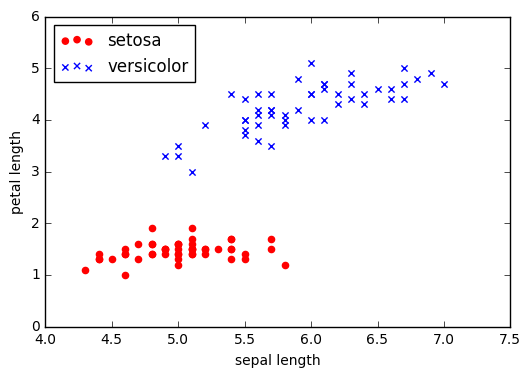

In [7]:
import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc="upper left")

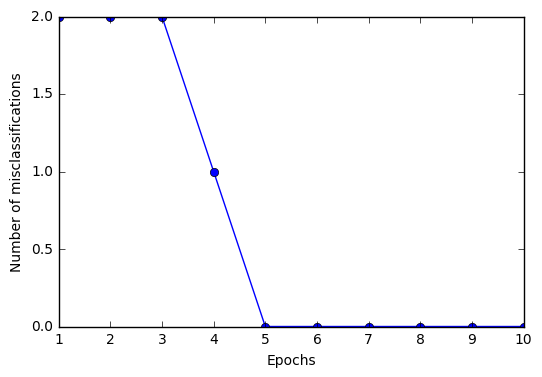

In [8]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of misclassifications")

As we can see in the above plot the algorithm converged after the 5^th epoch and should be now able to classify the training samples perfectly.

Let's define a function to visualize decision boundaries for 2D datasets.

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

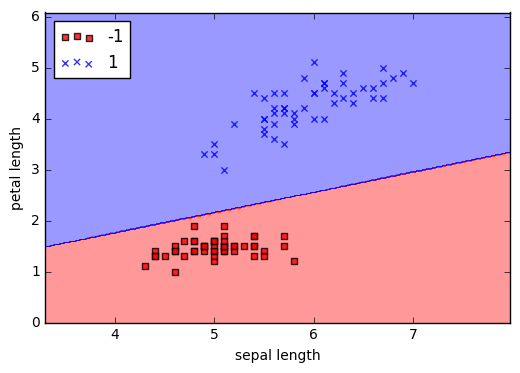

In [10]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc="upper left")